In [9]:
import pandas as pd
import numpy as np
import yfinance as yf
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., TSLA for Tesla): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data["Date"] = data.index
        data = data[["Date", "Close"]].dropna()

        # Feature engineering: converting the Date to integer format
        data["Date"] = data["Date"].apply(lambda x: x.toordinal())

        # Manually split the data into training and testing sets (80% train, 20% test)
        split_point = int(len(data) * 0.8)

        # Training data (first 80%)
        train_data = data[:split_point]
        X_train = train_data["Date"].values.reshape(-1, 1)
        y_train = train_data["Close"].values

        # Testing data (last 20%)
        test_data = data[split_point:]
        X_test = test_data["Date"].values.reshape(-1, 1)
        y_test = test_data["Close"].values

        # Train XGBoost model
        model = XGBRegressor(objective="reg:squarederror", random_state=42)
        model.fit(X_train, y_train)

        # Predict on both training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Predict stock price for the given prediction date
        prediction_ordinal = pd.Timestamp(prediction_date).toordinal()
        predicted_price = model.predict([[prediction_ordinal]])

        # Display predicted price
        print(f"Predicted stock price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0]:.2f}")

        # Evaluate the model
        def evaluate_model(y_true, y_pred, dataset_type):
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_true, y_pred)
            print(f"{dataset_type} Performance:")
            print(f"Mean Absolute Error (MAE): {mae:.2f}")
            print(f"Mean Squared Error (MSE): {mse:.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
            print(f"R² Score: {r2:.2f}")

        # Evaluate on training and testing sets
        evaluate_model(y_train, y_train_pred, "Training")
        evaluate_model(y_test, y_test_pred, "Testing")

        # Plot actual data and predictions
        plt.figure(figsize=(12, 6))
        plt.plot(data["Date"], data["Close"], label="Actual Prices", color="blue")
        plt.scatter(X_train, y_train_pred, label="Training Predictions", color="green", alpha=0.6)
        plt.scatter(X_test, y_test_pred, label="Testing Predictions", color="red", alpha=0.6)
        plt.scatter(prediction_ordinal, predicted_price[0], color="orange", label="Predicted Price", s=100)
        plt.title(f"{ticker} Stock Price Prediction with XGBoost")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

Enter the stock ticker symbol (e.g., TSLA for Tesla): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed


Predicted stock price for AAPL on 2024-12-06: $230.82
Training Performance:
Mean Absolute Error (MAE): 0.73
Mean Squared Error (MSE): 1.14
Root Mean Squared Error (RMSE): 1.07
R² Score: 1.00
Testing Performance:
Mean Absolute Error (MAE): 6.55
Mean Squared Error (MSE): 65.76
Root Mean Squared Error (RMSE): 8.11
R² Score: -0.49


In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., TSLA for Tesla): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data["Date"] = data.index
        data = data[["Date", "Close"]].dropna()

        # Feature engineering: converting the Date to integer format
        data["Date"] = data["Date"].apply(lambda x: x.toordinal())

        # Manually split the data into training and testing sets (80% train, 20% test)
        split_point = int(len(data) * 0.8)

        # Training data (first 80%)
        train_data = data[:split_point]
        X_train = train_data["Date"].values.reshape(-1, 1)
        y_train = train_data["Close"].values

        # Testing data (last 20%)
        test_data = data[split_point:]
        X_test = test_data["Date"].values.reshape(-1, 1)
        y_test = test_data["Close"].values

        # Train Linear Regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Predict on both training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Predict stock price for the given prediction date
        prediction_ordinal = pd.Timestamp(prediction_date).toordinal()
        predicted_price = model.predict([[prediction_ordinal]])

        # Display predicted price
        print(f"Predicted stock price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0].item():.2f}")

        # Evaluate the model
        def evaluate_model(y_true, y_pred, dataset_type):
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_true, y_pred)
            print(f"{dataset_type} Performance:")
            print(f"Mean Absolute Error (MAE): {mae:.2f}")
            print(f"Mean Squared Error (MSE): {mse:.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
            print(f"R² Score: {r2:.2f}")

        # Evaluate on training and testing sets
        evaluate_model(y_train, y_train_pred, "Training")
        evaluate_model(y_test, y_test_pred, "Testing")

        # Plot actual data and predictions
        plt.figure(figsize=(12, 6))
        plt.plot(data["Date"], data["Close"], label="Actual Prices", color="blue")
        plt.scatter(X_train, y_train_pred, label="Training Predictions", color="green", alpha=0.6)
        plt.scatter(X_test, y_test_pred, label="Testing Predictions", color="red", alpha=0.6)
        plt.scatter(prediction_ordinal, predicted_price[0], color="orange", label="Predicted Price", s=100)
        plt.title(f"{ticker} Stock Price Prediction with Linear Regression")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

Enter the stock ticker symbol (e.g., TSLA for Tesla): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed


Predicted stock price for AAPL on 2024-12-06: $214.26
Training Performance:
Mean Absolute Error (MAE): 10.83
Mean Squared Error (MSE): 180.63
Root Mean Squared Error (RMSE): 13.44
R² Score: 0.55
Testing Performance:
Mean Absolute Error (MAE): 18.23
Mean Squared Error (MSE): 359.54
Root Mean Squared Error (RMSE): 18.96
R² Score: -7.18


Enter the stock ticker symbol (e.g., TSLA for Tesla): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Predicted stock price for AAPL on 2024-12-06: $234.40
Root Mean Squared Error (RMSE): 18.61
Mean Absolute Error (MAE): 24.00
Mean Absolute Percentage Error (MAPE): 10.71%
R-squared (R²): -1456.61


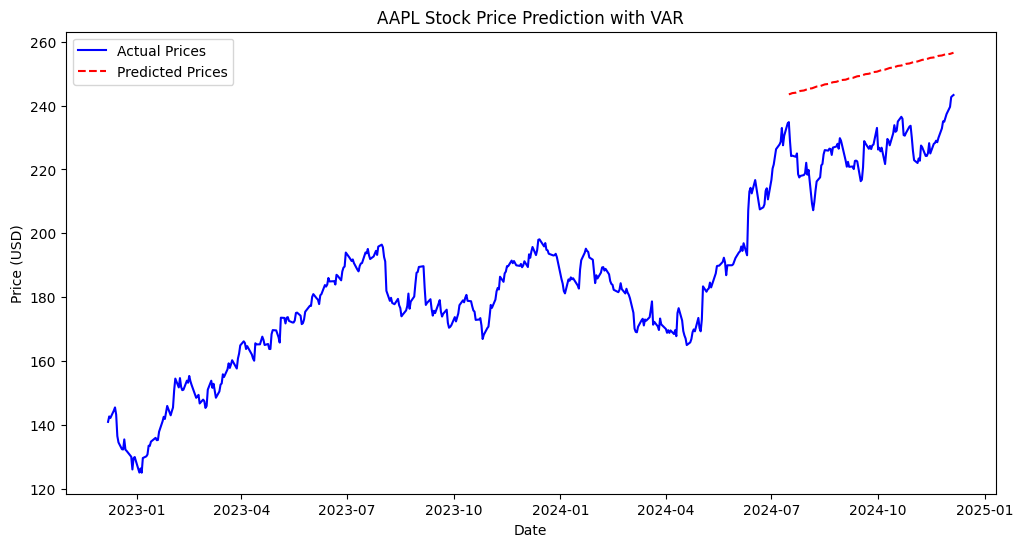

In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.api import VAR
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# Function to calculate MAE (Mean Absolute Error)
def mae(actual, predicted):
    return np.mean(np.abs(actual - predicted))

# Function to calculate MAPE (Mean Absolute Percentage Error)
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# Function to calculate R-squared (R²)
def r2_score(actual, predicted):
    ss_total = np.sum((actual - np.mean(actual)) ** 2)
    ss_residual = np.sum((actual - predicted) ** 2)
    return 1 - (ss_residual / ss_total)

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., TSLA for Tesla): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data["Date"] = data.index
        data = data[["Date", "Close"]].dropna()

        # Simulate multivariate data for VAR by duplicating the "Close" column
        data["Close_2"] = data["Close"]  # Duplicate to create another "variable"

        # Train-test split for the data
        train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
        train_data = data[:train_size]
        test_data = data[train_size:]

        # Fit the VAR model
        model = VAR(train_data[["Close", "Close_2"]])  # Use both columns
        model_fitted = model.fit(5)  # Lag order of 5 days (you can adjust)

        # Forecast for the next period
        forecast = model_fitted.forecast(train_data[["Close", "Close_2"]].values[-5:], steps=1)

        # Display forecasted price
        forecast_value = forecast[0][0]  # Extract the predicted value from the forecast array
        print(f"Predicted stock price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${forecast_value:.2f}")

        # Evaluate the model performance
        test_predictions = model_fitted.forecast(test_data[["Close", "Close_2"]].values[-5:], steps=len(test_data))

        # Calculate RMSE
        rmse_value = rmse(test_data["Close"].values, test_predictions[:, 0])

        # If rmse_value is an array, take the first element
        if isinstance(rmse_value, np.ndarray):
            rmse_value = rmse_value[0]

        # Calculate MAE
        mae_value = mae(test_data["Close"].values, test_predictions[:, 0])

        # Calculate MAPE
        mape_value = mape(test_data["Close"].values, test_predictions[:, 0])

        # Calculate R-squared (R²)
        r2_value = r2_score(test_data["Close"].values, test_predictions[:, 0])

        # Display RMSE, MAE, MAPE, and R² in the subheader
        print(f"Root Mean Squared Error (RMSE): {rmse_value:.2f}")
        print(f"Mean Absolute Error (MAE): {mae_value:.2f}")
        print(f"Mean Absolute Percentage Error (MAPE): {mape_value:.2f}%")
        print(f"R-squared (R²): {r2_value:.2f}")

        # Plot the actual vs predicted prices
        plt.figure(figsize=(12, 6))
        plt.plot(data["Date"], data["Close"], label="Actual Prices", color="blue")
        plt.plot(test_data["Date"], test_predictions[:, 0], label="Predicted Prices", color="red", linestyle="--")
        plt.title(f"{ticker} Stock Price Prediction with VAR")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

else:
    print("Please enter a valid stock ticker symbol.")


Enter the stock ticker symbol (e.g., TSLA for Tesla): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Predicted stock price for AAPL on 2024-12-06: $232.89

Training Performance:
Mean Absolute Error (MAE): 0.59
Mean Squared Error (MSE): 0.75
Root Mean Squared Error (RMSE): 0.87
R² Score: 1.00

Testing Performance:
Mean Absolute Error (MAE): 7.90
Mean Squared Error (MSE): 89.29
Root Mean Squared Error (RMSE): 9.45
R² Score: -1.03


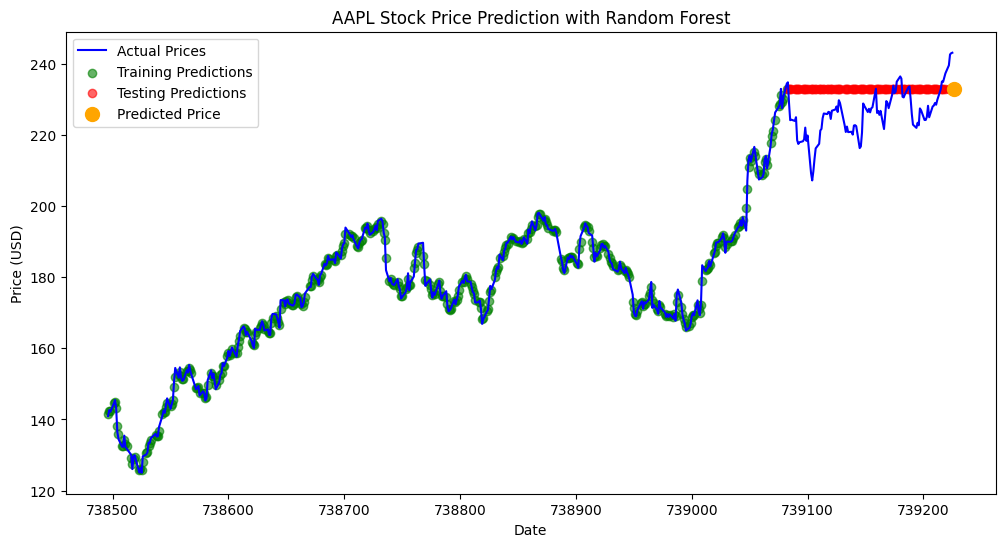

In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# Function to evaluate the model performance
def evaluate_model(y_true, y_pred, dataset_type):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_type} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., TSLA for Tesla): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data["Date"] = data.index
        data = data[["Date", "Close"]].dropna()

        # Feature engineering: converting the Date to integer format
        data["Date"] = data["Date"].apply(lambda x: x.toordinal())

        # Define the independent variable (X) and dependent variable (y)
        X = data["Date"].values.reshape(-1, 1)  # Date converted to ordinal as feature
        y = data["Close"].values  # Closing price is the target

        # Train-test split (80% training, 20% testing) - this is done by directly slicing the data
        train_size = int(len(data) * 0.8)  # 80% for training, 20% for testing
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]

        # Train Random Forest model
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)

        # Predict on both training and testing data
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Predict stock price for the given prediction date
        prediction_ordinal = pd.Timestamp(prediction_date).toordinal()
        predicted_price = model.predict([[prediction_ordinal]])

        # Display predicted price
        print(f"Predicted stock price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0]:.2f}")

        # Evaluate the model
        evaluate_model(y_train, y_train_pred, "Training")
        evaluate_model(y_test, y_test_pred, "Testing")

        # Plot actual data and predictions
        plt.figure(figsize=(12, 6))
        plt.plot(data["Date"], y, label="Actual Prices", color="blue")
        plt.scatter(X_train, y_train_pred, label="Training Predictions", color="green", alpha=0.6)
        plt.scatter(X_test, y_test_pred, label="Testing Predictions", color="red", alpha=0.6)
        plt.scatter(prediction_ordinal, predicted_price[0], color="orange", label="Predicted Price", s=100)
        plt.title(f"{ticker} Stock Price Prediction with Random Forest")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

else:
    print("Please enter a valid stock ticker symbol.")


In [45]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., TSLA for Tesla): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data["Date"] = data.index
        data = data[["Date", "Close"]].dropna()

        # Normalize the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1, 1))

        # Create sequences for LSTM
        def create_sequences(data, sequence_length):
            X, y = [], []
            for i in range(len(data) - sequence_length):
                X.append(data[i:i + sequence_length])
                y.append(data[i + sequence_length])
            return np.array(X), np.array(y)

        sequence_length = 100  # Using last 60 days to predict the next day
        X, y = create_sequences(scaled_data, sequence_length)

        # Split the data into training and testing sets
        split_point = int(len(X) * 0.8)
        X_train, y_train = X[:split_point], y[:split_point]
        X_test, y_test = X[split_point:], y[split_point:]

        # Build the LSTM model
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            LSTM(50, return_sequences=False),
            Dense(25),
            Dense(1)
        ])
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train the model
        model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_test, y_test), verbose=1)

        # Predict on testing data
        y_test_pred = model.predict(X_test)
        y_test_pred = scaler.inverse_transform(y_test_pred)  # De-normalize predictions
        y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # De-normalize actual values

        # Predict stock price for the given prediction date
        last_sequence = scaled_data[-sequence_length:]  # Use the last 60 days
        last_sequence = np.expand_dims(last_sequence, axis=0)
        predicted_price_scaled = model.predict(last_sequence)
        predicted_price = scaler.inverse_transform(predicted_price_scaled)

        # Display predicted price
        print(f"Predicted stock price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0][0]:.2f}")

        # Evaluate the model
        def evaluate_model(y_true, y_pred, dataset_type):
            mae = mean_absolute_error(y_true, y_pred)
            mse = mean_squared_error(y_true, y_pred)
            rmse = np.sqrt(mse)
            print(f"{dataset_type} Performance:")
            print(f"Mean Absolute Error (MAE): {mae:.2f}")
            print(f"Mean Squared Error (MSE): {mse:.2f}")
            print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

        evaluate_model(y_test_actual, y_test_pred, "Testing")

        # Convert predictions to 1D array for plotting
        y_test_pred_flat = y_test_pred.flatten()

        # Ensure the length of dates matches the predictions
        testing_dates = data["Date"].iloc[split_point:split_point + len(y_test_pred_flat)]

        # Calculate the required shift to align the last test date with the prediction date
        last_test_date = data["Date"].iloc[split_point + len(y_test_pred_flat) - 1].date()  # Convert to datetime.date
        days_to_shift = (prediction_date - last_test_date).days

        # Shift the testing dates
        shifted_testing_dates = data["Date"].iloc[split_point:split_point + len(y_test_pred_flat)] + pd.Timedelta(days=days_to_shift)

        # Plot the data
        plt.figure(figsize=(12, 6))
        plt.plot(data["Date"], data["Close"], label="Actual Prices", color="blue")
        plt.plot(shifted_testing_dates, y_test_pred_flat, label="Testing Predictions", color="red", alpha=0.6)
        plt.scatter(prediction_date, predicted_price[0][0], color="orange", label="Predicted Price", s=100)
        plt.title(f"{ticker} Stock Price Prediction with LSTM")
        plt.xlabel("Date")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()




Enter the stock ticker symbol (e.g., TSLA for Tesla): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed

Epoch 1/50



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - loss: 0.2477 - val_loss: 0.0104
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.0197 - val_loss: 0.0039
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0073 - val_loss: 0.0624
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0112 - val_loss: 0.0176
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0065 - val_loss: 0.0198
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0049 - val_loss: 0.0220
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0050 - val_loss: 0.0068
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0049 - val_loss: 0.0219
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0049 - val_loss: 0.0239
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0044 - val_loss: 0.0106
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0039 - val_loss: 0.0056
Epoch 13/5

Enter the stock ticker symbol (e.g., AAPL for Apple): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0882   
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0065 
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0034 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0023 
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0026 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017 
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0040  
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0020 
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0014 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted price for AAPL on 2024-12-06: $223.15
Test Mean Squared Error (MSE): 190.45
Test Mean Absolute Error (MAE): 13.07
Test Root Mean Squared Error (RMSE): 13.80


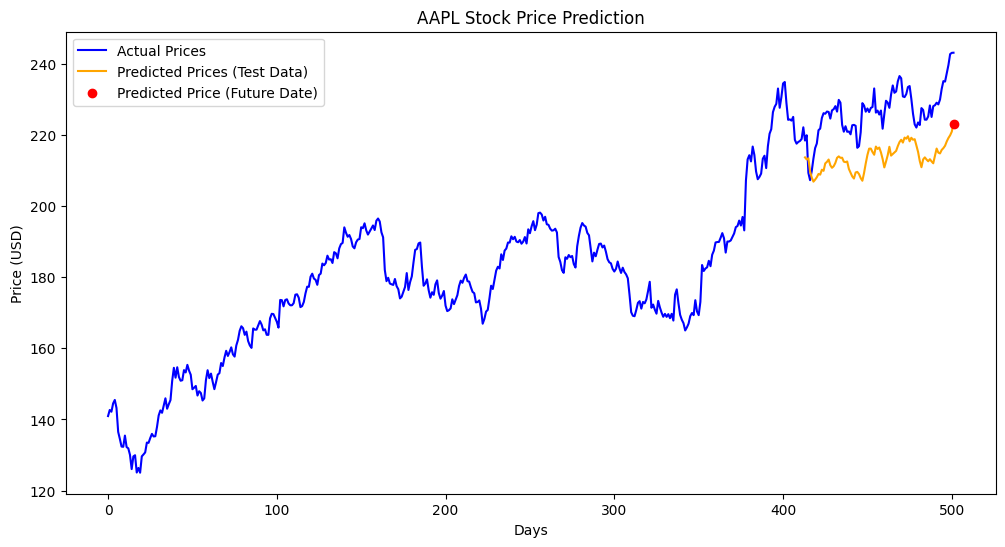

In [47]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data = data[["Close"]].values

        # Scale the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data)

        # Create feature and target datasets
        x_input, y_input = [], []
        for i in range(60, len(scaled_data)):
            x_input.append(scaled_data[i - 60 : i, 0])  # Last 60 days
            y_input.append(scaled_data[i, 0])  # Next day

        x_input, y_input = np.array(x_input), np.array(y_input)

        # Split data into training (80%) and testing (20%)
        train_size = int(0.8 * len(x_input))
        x_train, x_test = x_input[:train_size], x_input[train_size:]
        y_train, y_test = y_input[:train_size], y_input[train_size:]

        # Build ANN model
        model = Sequential()
        model.add(Dense(128, activation="relu", input_shape=(x_train.shape[1],)))
        model.add(Dense(64, activation="relu"))
        model.add(Dense(32, activation="relu"))
        model.add(Dense(1))  # Output layer for regression

        # Compile the model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train the model
        model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1)

        # Evaluate on training data
        train_predictions = model.predict(x_train)
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))

        # Evaluate on test data
        test_predictions = model.predict(x_test)
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
        y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Predict for the user-specified prediction date
        last_60_days = scaled_data[-60:]
        last_60_days = np.reshape(last_60_days, (1, -1))
        predicted_price = model.predict(last_60_days)
        predicted_price = scaler.inverse_transform(predicted_price)

        # Display the prediction
        print(f"Predicted price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0][0]:.2f}")

        # Calculate metrics for test data
        test_mse = mean_squared_error(y_test_inverse, test_predictions)
        test_mae = mean_absolute_error(y_test_inverse, test_predictions)
        test_rmse = np.sqrt(test_mse)

        # Print metrics
        print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
        print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")
        print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")

        # Plot actual vs predicted data
        plt.figure(figsize=(12, 6))

        # Plot the actual prices (blue line for the entire dataset)
        plt.plot(data, label="Actual Prices", color="blue")

        # Plot only the test data predictions (orange line)
        plt.plot(
            range(train_size + 60, len(data)),  # Index range for test data predictions
            test_predictions.flatten(),  # Flatten the test predictions array
            label="Predicted Prices (Test Data)",
            color="orange"
        )

        # Add the prediction for the user-specified date (red dot)
        plt.scatter(
            len(data) - 1,
            predicted_price[0][0],
            color="red",
            label="Predicted Price (Future Date)",
            zorder=5,
        )

        # Add metrics as text on the graph
        # plt.text(
        #     0.02, 0.95,
        #     f"Test MSE: {test_mse:.2f}\nTest MAE: {test_mae:.2f}\nTest RMSE: {test_rmse:.2f}",
        #     transform=plt.gca().transAxes,  # Position in axes-relative coordinates
        #     fontsize=12,
        #     bbox=dict(facecolor='white', alpha=0.6)  # White box for readability
        # )

        # Formatting the graph
        plt.title(f"{ticker} Stock Price Prediction")
        plt.xlabel("Days")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

else:
    print("Please enter a valid date.")

Enter the stock ticker symbol (e.g., AAPL for Apple): AAPL
Enter the prediction date (YY-MM-DD): 24-12-06


[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1326
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0129
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0124 
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0108
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0082
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0064
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted price for AAPL on 2024-12-06: $227.00
Test Mean Squared Error (MSE): 50.94
Test Mean Absolute Error (MAE): 5.63
Test Root Mean Squared Error (RMSE): 7.14


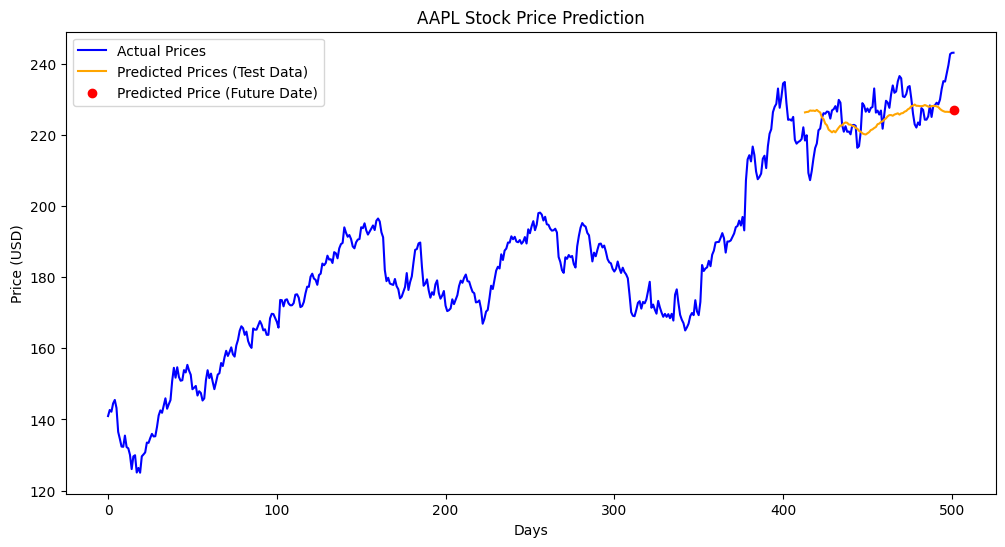

In [48]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch stock data from Yahoo Finance
def get_data_from_yahoo(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    return data

# User input for stock ticker and prediction date
ticker = input("Enter the stock ticker symbol (e.g., AAPL for Apple): ")
prediction_date_input = input("Enter the prediction date (YY-MM-DD): ")

# Convert the prediction date to a datetime object by adding '20' to the year
try:
    prediction_date = datetime.strptime('20' + prediction_date_input, "%Y-%m-%d").date()
except ValueError:
    print("Invalid date format. Please use the format 'YY-MM-DD'.")
    prediction_date = None

if prediction_date:
    # Calculate the start date (2 years before the prediction date)
    start_date = prediction_date - timedelta(days=2 * 365)
    start_date_str = start_date.strftime("%Y-%m-%d")
    end_date_str = prediction_date.strftime("%Y-%m-%d")

    # Fetch stock data
    data = get_data_from_yahoo(ticker, start_date_str, end_date_str)

    # Check if data is sufficient
    if len(data) < 60:
        print("Not enough data available. At least 60 data points are required.")
    else:
        # Prepare the data
        data = data[["Close"]].values

        # Scale the data
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(data)

        # Create feature and target datasets
        x_input, y_input = [], []
        for i in range(60, len(scaled_data)):
            x_input.append(scaled_data[i - 60 : i, 0])  # Last 60 days
            y_input.append(scaled_data[i, 0])  # Next day

        x_input, y_input = np.array(x_input), np.array(y_input)

        # Reshape the data for 1D CNN input
        x_input = x_input.reshape(x_input.shape[0], x_input.shape[1], 1)  # (samples, timesteps, features)

        # Split data into training (80%) and testing (20%)
        train_size = int(0.8 * len(x_input))
        x_train, x_test = x_input[:train_size], x_input[train_size:]
        y_train, y_test = y_input[:train_size], y_input[train_size:]

        # Build 1D CNN model
        model = Sequential()

        # Add Conv1D and MaxPooling layers
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
        model.add(MaxPooling1D(pool_size=2))

        # Flatten the output from the Conv1D layers to feed into Dense layers
        model.add(Flatten())

        # Add Dense layer
        model.add(Dense(32, activation="relu"))
        model.add(Dense(1))  # Output layer for regression

        # Compile the model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train the model
        model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1)

        # Evaluate on training data
        train_predictions = model.predict(x_train)
        train_predictions = scaler.inverse_transform(train_predictions.reshape(-1, 1))
        y_train_inverse = scaler.inverse_transform(y_train.reshape(-1, 1))

        # Evaluate on test data
        test_predictions = model.predict(x_test)
        test_predictions = scaler.inverse_transform(test_predictions.reshape(-1, 1))
        y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Predict for the user-specified prediction date
        last_60_days = scaled_data[-60:]
        last_60_days = np.reshape(last_60_days, (1, -1, 1))  # Reshaped for 1D CNN input
        predicted_price = model.predict(last_60_days)
        predicted_price = scaler.inverse_transform(predicted_price)

        # Display the prediction
        print(f"Predicted price for {ticker} on {prediction_date.strftime('%Y-%m-%d')}: ${predicted_price[0][0]:.2f}")

        # Calculate metrics for test data
        test_mse = mean_squared_error(y_test_inverse, test_predictions)
        test_mae = mean_absolute_error(y_test_inverse, test_predictions)
        test_rmse = np.sqrt(test_mse)

        # Print metrics
        print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
        print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")
        print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")

        # Plot actual vs predicted data
        plt.figure(figsize=(12, 6))

        # Plot the actual prices (blue line for the entire dataset)
        plt.plot(data, label="Actual Prices", color="blue")

        # Plot only the test data predictions (orange line)
        plt.plot(
            range(train_size + 60, len(data)),  # Index range for test data predictions
            test_predictions.flatten(),  # Flatten the test predictions array
            label="Predicted Prices (Test Data)",
            color="orange"
        )

        # Add the prediction for the user-specified date (red dot)
        plt.scatter(
            len(data) - 1,
            predicted_price[0][0],
            color="red",
            label="Predicted Price (Future Date)",
            zorder=5,
        )

        # Add metrics as text on the graph
        # plt.text(
        #     0.02, 0.95,
        #     f"Test MSE: {test_mse:.2f}\nTest MAE: {test_mae:.2f}\nTest RMSE: {test_rmse:.2f}",
        #     transform=plt.gca().transAxes,  # Position in axes-relative coordinates
        #     fontsize=12,
        #     bbox=dict(facecolor='white', alpha=0.6)  # White box for readability
        # )

        # Formatting the graph
        plt.title(f"{ticker} Stock Price Prediction")
        plt.xlabel("Days")
        plt.ylabel("Price (USD)")
        plt.legend()
        plt.show()

else:
    print("Please enter a valid date.")